# (Feb-2019 Ford GoBike Trip Dataset Exploration)
## by (Walid Ismail)

## 0. Introduction

> Briefly introduce your dataset here.

## 1. Import Modules and Load Dataset

In [466]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('default')
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [467]:
df_trips = pd.read_csv("./Datasets/201902-fordgobike-tripdata.csv")
df_trips.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [468]:
# how many rows and columns
df_trips.shape

(183412, 16)

In [469]:
# what are the columns data types and do we have columns with null values
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

## 2. Data Wrangling
### 2.1 Create New Columns

In [470]:
# Convert date / time fields to datetime data type
df_trips['start_time'] = pd.to_datetime(df_trips['start_time'])
df_trips['end_time'] = pd.to_datetime(df_trips['end_time'])

In [471]:
# Add duration in minutes column
df_trips['duration_min'] = df_trips['duration_sec'] / 60

In [472]:
# Add weekday for further analysis
import calendar
df_trips['day'] = df_trips['start_time'].apply(lambda x: calendar.day_name[x.weekday()])

# Order it
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekdays_classes = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)

df_trips['day'] = df_trips['day'].astype(weekdays_classes);

def is_weekend(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return "No"
    else:
        return "Yes"

df_trips['weekend'] = df_trips['day'].apply(is_weekend)

In [473]:
# Create Age column
df_trips['age'] = df_trips['start_time'].apply(lambda x: x.year) - df_trips['member_birth_year']

df_trips['age'].min(), df_trips['age'].max()

(18.0, 141.0)

In [474]:
# Create age groups column
age_groups = ['Under 12', '12-17 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65-74 years old', '75 years or older']

# Create age groups
df_trips['age_group'] = pd.cut(df_trips['age'], [0, 12, 18, 25, 35, 45, 55, 65, 75, df_trips['age'].max()+1], labels=age_groups, right=False)

age_groups_type = pd.api.types.CategoricalDtype(ordered=True, categories=age_groups)

df_trips['age_group'] = df_trips['age_group'].astype(age_groups_type)
df_trips.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
1                            Berry St at 4th St             37.775880  ...   
2  Powell St BART Station (Market St at 4th St)             37.786375  ...   
3                        Central Ave at Fell St             37.773311  ...   
4                         10th Ave at E 15th St             37.792714  ...   

   bike_id   user_type member_birth_year  member_gender  \
0     4902    Customer            1984.0           Male   
1     2535    Customer               NaN            NaN   
2     5905    Customer            1972.0           Male   
3     6638  Subscriber            1989.0          Other   
4     4898  Subscriber            1974.0           Male   

  bike_share_for_all_trip duration_min       day weekend   age  \
0                      No   869.750000  Thursday      No  35.0   
1                      No   708.683333  Thursday      No   NaN   
2                      No  1030.900000  Thursday      No  47.0   
3                      No   608.166667  Thursday      No  30.0   
4                     Yes    26.416667  Thursday      No  45.0   

         age_group  
0  35-44 years old  
1              NaN  
2  45-54 years old  
3  25-34 years old  
4  45-54 years old  

[5 rows x 21 columns]

In [475]:
# Generate lat, long to city map if not present and add city column to start and end stations

# import library and create object for city lookup given latitude and longitude
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="fordgobike_explorer")

# retrieve city given latitude and longitude
def map_station_to_city(station_latitude, station_longitude):
    location = geolocator.reverse("{}, {}".format(station_latitude, station_longitude))
    try:
        city = location.raw['address']['city']
    except:
        city = location.raw['address']['town']
    return city

# Append city to latitude and longitude column in a row
def append_station_city(row):
    row['city'] = map_station_to_city(row['latitude'], row['longitude'])
    return row

# function to generate a dataframe of latitude and longitude and corresponding city
def generate_lat_long_df():
    # retrieve all stations coordintaes in one dataframe
    id = []
    latitudes = []
    longitudes = []

    for index, row in df_trips.iterrows():
        id.append(row['start_station_id'])
        latitudes.append(row['start_station_latitude'])
        longitudes.append(row['start_station_longitude'])

        id.append(row['end_station_id'])
        latitudes.append(row['end_station_latitude'])
        longitudes.append(row['end_station_longitude'])

    lat_long_df = pd.DataFrame({'id': id,
                                'latitude': latitudes,
                                'longitude': longitudes})

    lat_long_df.drop_duplicates(subset = ['id'], inplace=True)

    lat_long_df = lat_long_df.apply(append_station_city, axis=1)
    lat_long_df.head()
    lat_long_df.to_csv("./Datasets/lat_long_city.csv", index=False)

    return lat_long_df

# load/generate latitude, longitude and city CSV file
try:
    lat_long_df = pd.read_csv("./Datasets/lat_long_city.csv")
except:
    lat_long_df = generate_lat_long_df()

lat_long_df = lat_long_df.set_index(['id'])

# Create city columns and append to main dataframe
start_city = []
end_city = []
for index, row in df_trips.iterrows():
    if pd.isnull(row['start_station_id']) :
        start_city.append(map_station_to_city(row['start_station_latitude'], row['start_station_longitude']))
        #print("start null")
    else:
        start_city.append(lat_long_df.loc[row['start_station_id']]['city'])
    
    if pd.isnull(row['end_station_id']) :
        end_city.append(map_station_to_city(row['end_station_latitude'], row['end_station_longitude']))
        #print("end null")
    else:
        end_city.append(lat_long_df.loc[row['end_station_id']]['city'])

# append start_city and end_city to trips data dataframe
df_trips['start_city'] = start_city
df_trips['end_city'] = end_city    

In [476]:
# What are the cities in our dataset?
df_trips['start_city'].unique(), df_trips['end_city'].unique()

(array(['San Francisco', 'Oakland', 'San Jose', 'Berkeley', 'Emeryville',
        'Santa Clara'], dtype=object),
 array(['San Francisco', 'Oakland', 'San Jose', 'Berkeley', 'Emeryville',
        'Santa Clara', 'Milpitas'], dtype=object))

In [477]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### 2.2 Summary Statistics (Before data cleanup)

In [478]:
df_trips.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year   duration_min  \
count          183412.000000  183412.000000      175147.000000  183412.000000   
mean             -122.352250    4472.906375        1984.806437      12.101307   
std                 0.116673    1664.383394          10.116689      29.906496   
min              -122.453704      11.000000        1878.000000       1.016667   
25%              -122.411726    3777.000000        1980.000000       5.416667   
50%              -122.398279    4958.000000        1987.000000       8.566667   
75%              -122.288045    5502.000000        1992.000000      13.266667   
max              -121.874119    6645.000000        2001.000000    1424.066667   

                 age  
count  175147.000000  
mean       34.193563  
std        10.116689  
min        18.000000  
25%        27.000000  
50%        32.000000  
75%        39.000000  
max       141.000000

#### From the above descriptive statistics, it appears that the trip duration and cyclist age columns have outliers. Lets investigate those columns in more depth.

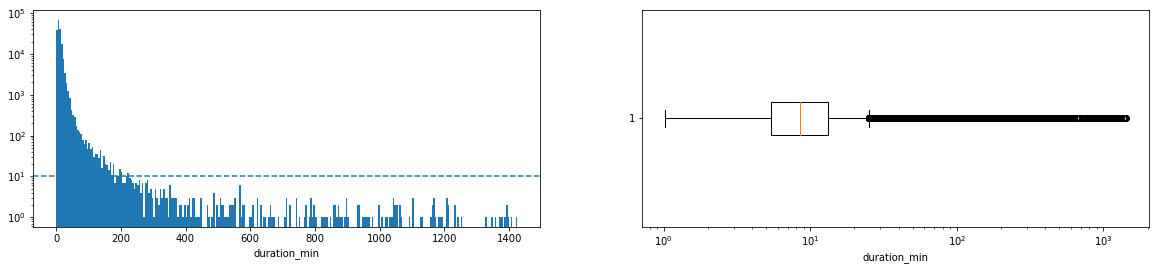

In [479]:
# Visualize duration_min column
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
bins = np.arange(0, df_trips.duration_min.max()+1, 5)
plt.hist(data = df_trips, x = 'duration_min', bins = bins);
plt.xlabel("duration_min")
plt.yscale("log")
plt.axhline(10, linestyle = '--')

plt.subplot(1, 2, 2)
plt.boxplot(df_trips['duration_min'], vert=False)
plt.xlabel("duration_min")
plt.xscale('log')

In [480]:
# How many points are considered outliers by the boxplot? top_whisker = 1.5 * IQR + Q3
duration_min_top_whisker = 1.5 * (df_trips['duration_min'].describe()['75%'] - df_trips['duration_min'].describe()['25%']) + df_trips['duration_min'].describe()['75%']
duration_min_top_whisker

25.041666666666668

In [481]:
(df_trips['duration_min'] > duration_min_top_whisker).sum()

10131

In [482]:
# drop rows with duration_min outliers
#df_trips = df_trips[df_trips['duration_min'] <= duration_top_whisker]

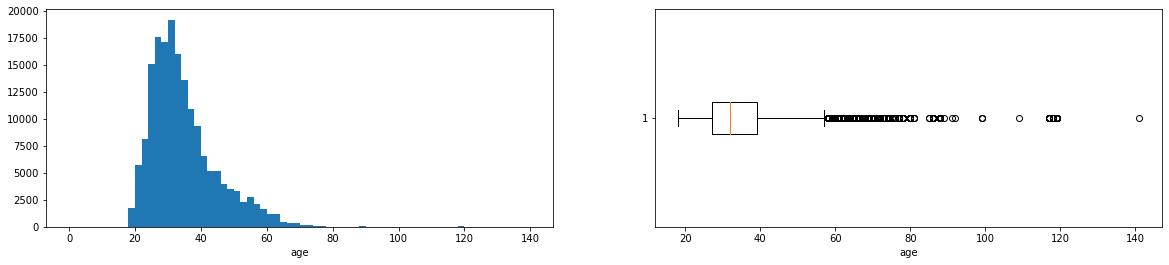

In [483]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
bins = np.arange(0, df_trips.age.max()+1, 2)
plt.hist(data = df_trips, x = 'age', bins = bins);
plt.xlabel("age")
#plt.yscale("log")

plt.subplot(1, 2, 2)
plt.boxplot(df_trips['age'].dropna(), vert=False) # age columns contains NaN so will need to filter thosse out to get the boxplot to render correctly
plt.xlabel("age");
#plt.xscale('log')

In [484]:
# How many age points are outliers?
age_top_whisker = 1.5 * (df_trips['age'].describe()['75%'] - df_trips['age'].describe()['25%']) + df_trips['age'].describe()['75%']
age_top_whisker
(df_trips['age'] > age_top_whisker).sum()

5782

In [485]:
# Drop rows with age outliers
#df_trips = df_trips[df_trips['age'] <= age_top_whisker]

In [486]:
# Check for NaN values
df_trips.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
duration_min                  0
day                           0
weekend                       0
age                        8265
age_group                  8265
start_city                    0
end_city                      0
dtype: int64

In [487]:
# Check how many "Other" as gender type and drop if relatively few
df_group = df_trips.groupby("member_gender").size()
df_group

member_gender
Female     40844
Male      130651
Other       3652
dtype: int64

In [488]:
#df_trips.drop(index = df_trips.index[df_trips['member_gender'] == 'Other'], inplace = True)

df_group = df_trips.groupby("member_gender").size()
df_group

member_gender
Female     40844
Male      130651
Other       3652
dtype: int64

### 2.3 Summary Statistics (after data cleanup)

In [489]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [490]:
df_trips.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year   duration_min  \
count          183412.000000  183412.000000      175147.000000  183412.000000   
mean             -122.352250    4472.906375        1984.806437      12.101307   
std                 0.116673    1664.383394          10.116689      29.906496   
min              -122.453704      11.000000        1878.000000       1.016667   
25%              -122.411726    3777.000000        1980.000000       5.416667   
50%              -122.398279    4958.000000        1987.000000       8.566667   
75%              -122.288045    5502.000000        1992.000000      13.266667   
max              -121.874119    6645.000000        2001.000000    1424.066667   

                 age  
count  175147.000000  
mean       34.193563  
std        10.116689  
min        18.000000  
25%        27.000000  
50%        32.000000  
75%        39.000000  
max       141.000000

In [491]:
df_trips.shape

(183412, 23)

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## 3. Univariate Exploration

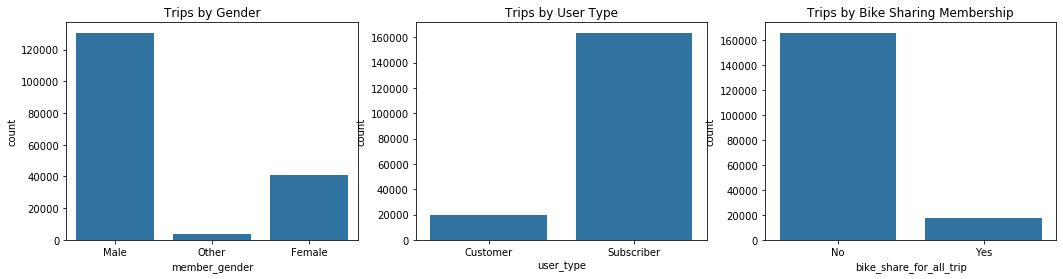

In [492]:
plt.figure(figsize=(24, 4))
ax = plt.subplot(1, 4, 1)
sb.countplot(data=df_trips, x='member_gender', color=sb.color_palette()[0])
plt.title("Trips by Gender")

plt.subplot(1, 4, 2)
sb.countplot(data=df_trips, x='user_type', color=sb.color_palette()[0])
plt.title("Trips by User Type")

plt.subplot(1, 4, 3)
sb.countplot(data=df_trips, x='bike_share_for_all_trip', color=sb.color_palette()[0])
plt.title("Trips by Bike Sharing Membership");

The above charts show that our cyclists are mostly males, and mostly subscibers. Also note that most trips are for cyclists not enrolled in the <b>Bike Share for All</b> program for low-income residents

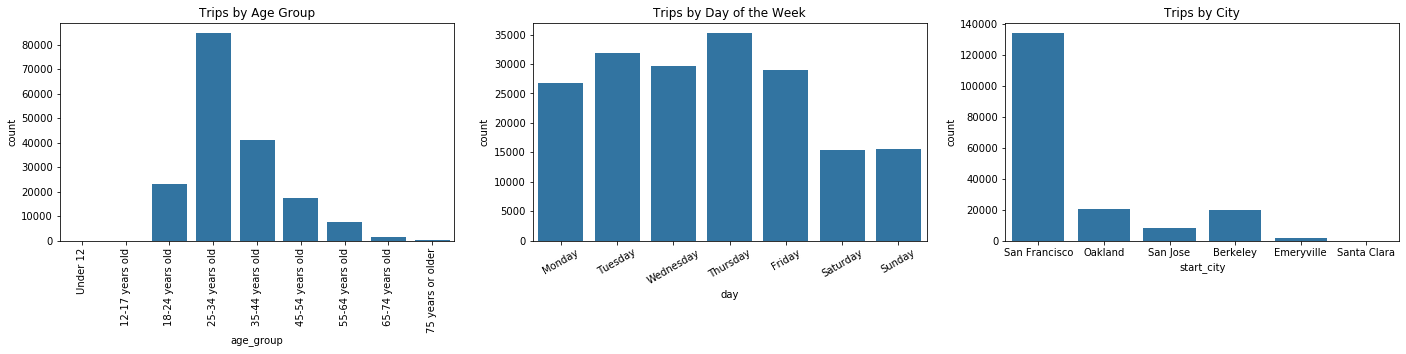

In [493]:
plt.figure(figsize=(24, 4))

# What is the number of trips by age group?
plt.subplot(1, 3, 1)
sb.countplot(data=df_trips, x='age_group', color=sb.color_palette()[0])
plt.xticks(rotation=90);
plt.title("Trips by Age Group");

plt.subplot(1, 3, 2)
sb.countplot(data=df_trips, x='day', color=sb.color_palette()[0])
plt.xticks(rotation=30);
plt.title("Trips by Day of the Week");

plt.subplot(1, 3, 3)
sb.countplot(data=df_trips, x='start_city', color=sb.color_palette()[0])
plt.title("Trips by City");

The above charts show that most of our cyclists in <b>San Francisco</b> and in the <b>25-34 age group</b>. We can also see that most trips are taken on <b>Thursdays</b> and notice a sharp decline in the number of trip during the weekend, maybe our cyclists are using their rides to commute to work??

In [494]:
# Are there any trips across the bay?


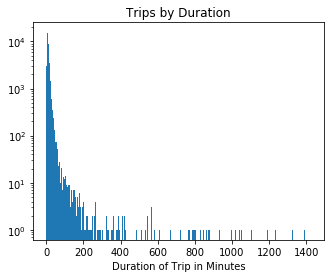

In [495]:
plt.figure(figsize=(24, 4))

plt.subplot(1, 4, 1)
bins = np.arange(0, df_trips.duration_min.max()+1, 1)
plt.hist(data = df_trips, x = 'duration_min', bins = bins);
plt.xlabel("Duration of Trip in Minutes")
plt.yscale("log")
plt.title("Trips by Duration");

We can see that most of the trips are in the <b>5-10 minutes range</b> with a skew to the right.

In [496]:
def get_city_coordinates(name):
    from geopy.geocoders import Nominatim

    # Visualize Stations
    address = name

    geolocator = Nominatim(user_agent="to_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(name, latitude, longitude))

    return latitude, longitude

In [497]:
df_start_stations = df_trips[['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']]
df_start_stations = df_start_stations.drop_duplicates()
len(df_start_stations)

343

In [498]:
color_map = {0: '#FFC300', 1: '#FF5733', 2: '#C70039', 3: '#900C3F', 4: '#581845'}
#color_map = {0: '#AED6F1', 1: '#85C1E9', 2: '#3498DB', 3: '#2E86C1', 4: '#2874A6'}

In [499]:
df_start_stations = df_trips.groupby(['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']).size().to_frame('trips')
df_start_stations = df_start_stations.reset_index()
df_start_stations['trip_cat'] = pd.cut(df_start_stations['trips'], bins = 5, labels = [0, 1, 2, 3, 4])
df_start_stations['color'] = df_start_stations['trip_cat'].apply(lambda x: color_map[x])
df_start_stations

start_station_id                            start_station_name  \
0                 3.0  Powell St BART Station (Market St at 4th St)   
1                 4.0                   Cyril Magnin St at Ellis St   
2                 5.0  Powell St BART Station (Market St at 5th St)   
3                 6.0                 The Embarcadero at Sansome St   
4                 7.0                           Frank H Ogawa Plaza   
..                ...                                           ...   
324             385.0                   Woolsey St at Sacramento St   
325             386.0                        24th St at Bartlett St   
326             388.0         Backesto Park (Jackson St at 13th St)   
327             389.0                           Taylor St at 9th St   
328             398.0                    Leavenworth St at Broadway   

     start_station_latitude  start_station_longitude  trips trip_cat    color  
0                 37.786375              -122.404904   2760        3  #900C3F  
1                 37.785881              -122.408915    610        0  #FFC300  
2                 37.783899              -122.408445   2327        2  #C70039  
3                 37.804770              -122.403234   2082        2  #C70039  
4                 37.804562              -122.271738    827        1  #FF5733  
..                      ...                      ...    ...      ...      ...  
324               37.850578              -122.278175    359        0  #FFC300  
325               37.752105              -122.419724    464        0  #FFC300  
326               37.352887              -121.886050     17        0  #FFC300  
327               37.353062              -121.891937     13        0  #FFC300  
328               37.796471              -122.416858     17        0  #FFC300  

[329 rows x 7 columns]

In [500]:
import folium # map rendering library

f = folium.Figure(width=1200, height=450)

address = 'Bay Area, California'

#geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco Bay Area are {}, {}.'.format(latitude, longitude))

# create map of New York using latitude and longitude values
map_sanfrancisco = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, id, name, color, radius in zip(df_start_stations['start_station_latitude'], df_start_stations['start_station_longitude'], df_start_stations['start_station_id'], df_start_stations['start_station_name'], df_start_stations['color'], df_start_stations['trip_cat']):
    label = '{}, {}'.format(id, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(radius+2)*2,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfrancisco)  
    
f.add_child(map_sanfrancisco)
f

The geograpical coordinate of San Francisco Bay Area are 37.7884969, -122.3558473.


By zooming on the map we can see that most trips start from the stations on <b>Market Street</b> and <b>Townsend Street</b> in San Franciso. For Berkeley most trips start on <b>Bancroft Way</b>. 

In [501]:
df_end_stations = df_trips.groupby(['end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']).size().to_frame('trips')
df_end_stations = df_end_stations.reset_index()
df_end_stations['trip_cat'] = pd.cut(df_end_stations['trips'], bins = 5, labels = [0, 1, 2, 3, 4])
df_end_stations['color'] = df_end_stations['trip_cat'].apply(lambda x: color_map[x])
df_end_stations

end_station_id                              end_station_name  \
0               3.0  Powell St BART Station (Market St at 4th St)   
1               4.0                   Cyril Magnin St at Ellis St   
2               5.0  Powell St BART Station (Market St at 5th St)   
3               6.0                 The Embarcadero at Sansome St   
4               7.0                           Frank H Ogawa Plaza   
..              ...                                           ...   
324           385.0                   Woolsey St at Sacramento St   
325           386.0                        24th St at Bartlett St   
326           388.0         Backesto Park (Jackson St at 13th St)   
327           389.0                           Taylor St at 9th St   
328           398.0                    Leavenworth St at Broadway   

     end_station_latitude  end_station_longitude  trips trip_cat    color  
0               37.786375            -122.404904   2997        3  #900C3F  
1               37.785881            -122.408915    609        0  #FFC300  
2               37.783899            -122.408445   2353        2  #C70039  
3               37.804770            -122.403234   2512        2  #C70039  
4               37.804562            -122.271738    778        0  #FFC300  
..                    ...                    ...    ...      ...      ...  
324             37.850578            -122.278175    361        0  #FFC300  
325             37.752105            -122.419724    484        0  #FFC300  
326             37.352887            -121.886050     21        0  #FFC300  
327             37.353062            -121.891937     11        0  #FFC300  
328             37.796471            -122.416858     12        0  #FFC300  

[329 rows x 7 columns]

In [502]:
f = folium.Figure(width=1200, height=450)

# create map of New York using latitude and longitude values
map_sanfrancisco = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, id, name, color, radius in zip(df_end_stations['end_station_latitude'], df_end_stations['end_station_longitude'], df_end_stations['end_station_id'], df_end_stations['end_station_name'], df_end_stations['color'], df_end_stations['trip_cat']):
    label = '{}, {}'.format(id, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=(radius+2)*2,
        popup=label,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfrancisco)  
    
f.add_child(map_sanfrancisco)
f

The above map shows that most trips end at stations on <b>Market Street</b> and <b>Townsend Street</b> too. For Berkeley most trips end on <b>Bancroft Way</b>.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## 4. Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

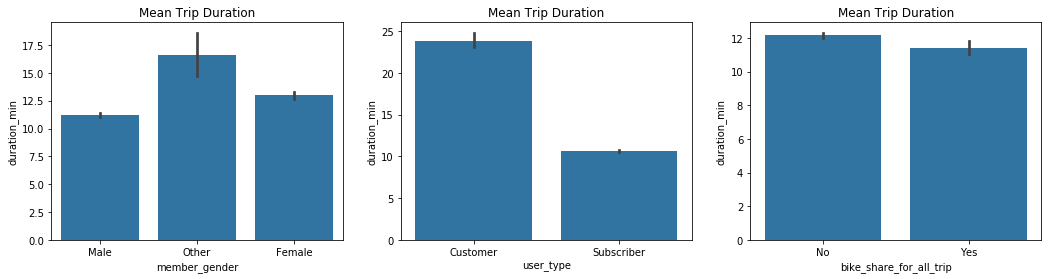

In [503]:
plt.figure(figsize=(24, 4))

plt.subplot(1,4,1)
sb.barplot(data=df_trips, x='member_gender', y='duration_min', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration");

plt.subplot(1,4,2)
sb.barplot(data=df_trips, x='user_type', y='duration_min', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration");

plt.subplot(1,4,3)
sb.barplot(data=df_trips, x='bike_share_for_all_trip', y='duration_min', color=sb.color_palette()[0])
#plt.xticks(rotation=90);
plt.title("Mean Trip Duration");

We notice that the average of the trip is highest for Other gender category. We also note that mean trip duration is slightly higher for females tha males. Also regular customers (non-subscriber) tend to take longer rides on average. We can also note that those subsrcibed in the "Bike Share for All" program take slightly shorter trips.

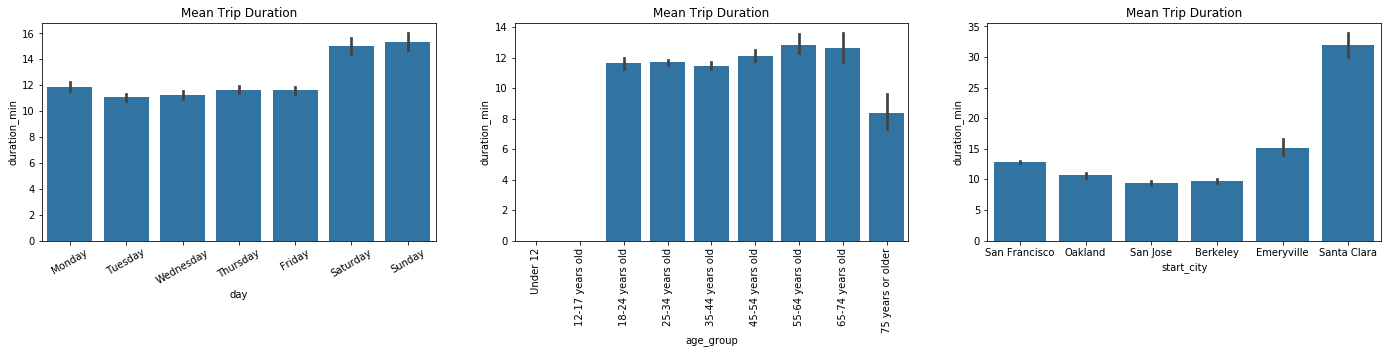

In [504]:
plt.figure(figsize=(24, 4))

plt.subplot(1,3,1)
sb.barplot(data=df_trips, x='day', y='duration_min', color=sb.color_palette()[0]) # Barplot shows measure of quantitative against each level of qualitative variable
plt.xticks(rotation=30);
plt.title("Mean Trip Duration");

plt.subplot(1,3,2)
sb.barplot(data=df_trips, x='age_group', y='duration_min', color=sb.color_palette()[0])
plt.xticks(rotation=90);
plt.title("Mean Trip Duration");

plt.subplot(1,3,3)
sb.barplot(data=df_trips, x='start_city', y='duration_min', color=sb.color_palette()[0])
plt.title("Mean Trip Duration");

The mean trip duration is approx the same across weekdays (with a notable increase in the weekend days). It is also practically the same across age groups with those in above 75 years age group taking shorter trip on average. We can also see the high trip durations fors trip in Santa Clare compare to the other cities.

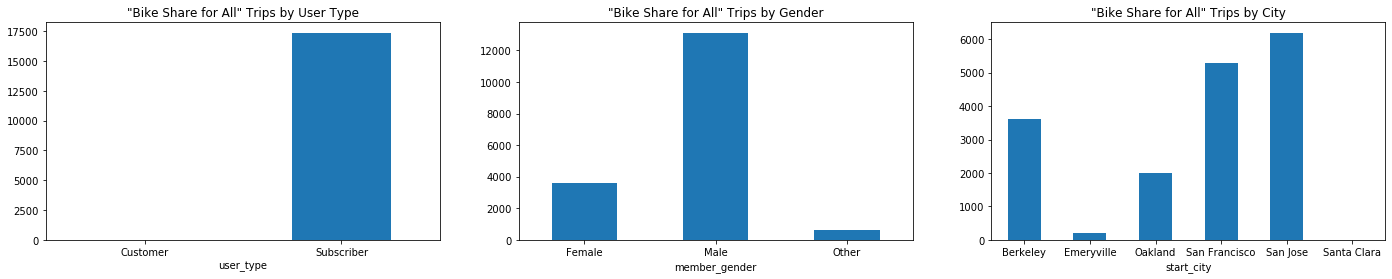

In [505]:
plt.figure(figsize=(24, 4))

ax = plt.subplot(1, 3, 1)
# Number of trips by gender and user_type
df_trips.groupby(['user_type', 'bike_share_for_all_trip']).size().unstack()['Yes'].plot(kind='bar', ax=ax, title = '"Bike Share for All" Trips by User Type', rot=0)

ax = plt.subplot(1, 3, 2)
# Number of trips by gender and user_type
df_trips.groupby(['member_gender', 'bike_share_for_all_trip']).size().unstack()['Yes'].plot(kind='bar', ax=ax, title = '"Bike Share for All" Trips by Gender', rot=0)

ax = plt.subplot(1, 3, 3)
# In which city are most "Bike Share for All" rides taken??
df_trips.groupby(['start_city', 'bike_share_for_all_trip']).size().unstack()['Yes'].plot(kind='bar', ax=ax, title = '"Bike Share for All" Trips by City', rot=0)

We can see charts above that all <b>"Bike Share for All"</b> rides are taken by <b>Subscribers</b>, the vast majority of them are <b>males</b> and their trips are mainly in </b>San Jose, San Francisco and Berkeley</b>.

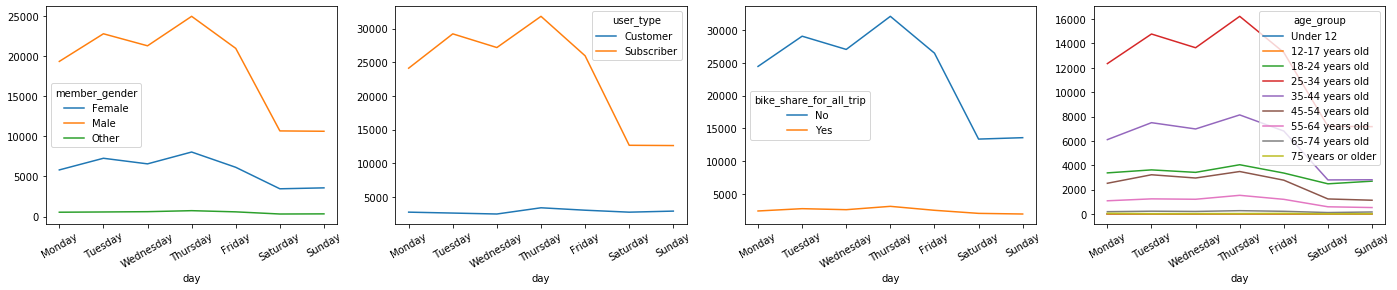

In [506]:
plt.figure(figsize=(24, 4))

ax = plt.subplot(1, 4, 1)
df_trips.groupby(['day', 'member_gender']).size().unstack().plot(ax = ax)
plt.xticks(rotation = 30)

ax = plt.subplot(1, 4, 2)
df_trips.groupby(['day', 'user_type']).size().unstack().plot(ax = ax)
plt.xticks(rotation = 30);

ax = plt.subplot(1, 4, 3)
df_trips.groupby(['day', 'bike_share_for_all_trip']).size().unstack().plot(ax = ax)
plt.xticks(rotation = 30);

ax = plt.subplot(1, 4, 4)
df_trips.groupby(['day', 'age_group']).size().unstack().plot(ax = ax)
plt.xticks(rotation = 30);

The above plots confirm the pattern of sharp decline in number of trips on Saturday and Sundays continues across gender, user type, bike share program and age groups. We can also see that Thursday is the day for most trips taken across the four categories.

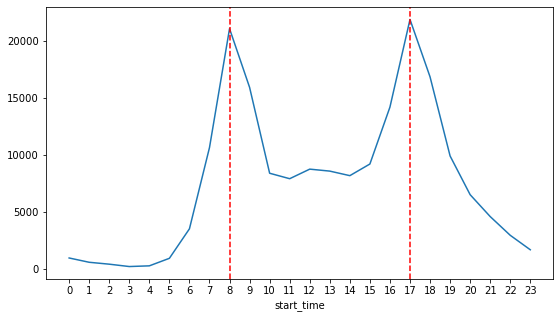

In [518]:
fig = plt.figure(figsize = [20,5])

ax = plt.subplot(1, 2, 1)
df_trips.groupby([df_trips['start_time'].dt.hour]).size().plot()

plt.axvline(8, linestyle = '--', color='r')
plt.xticks([_ for _ in range(24)])
plt.axvline(17,linestyle = '--', color='r');

The line plot above show a very interesting trend. We can clearly see that <b>most of the trips start at 8AM and at 5PM</b> which is a strong sign that cyclists use  our bikes to commute to/from work. We also see a smaller flat peek of around a 10000 trips during the whole week between 10 AM and 3PM.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## 5. Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

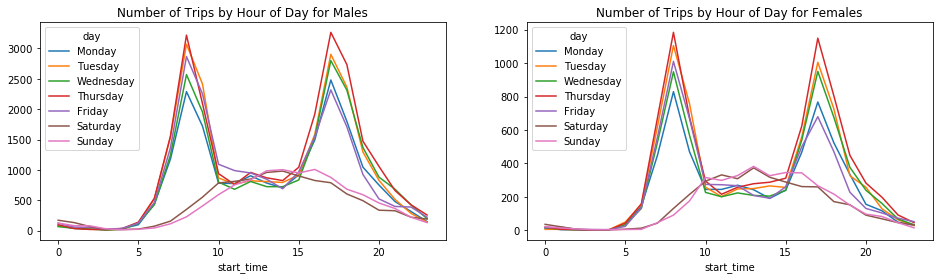

In [508]:
fig, axes = plt.subplots(ncols = 2, figsize = [16,4])

df_trips[df_trips['member_gender'] == "Male"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Males", ax = axes[0]);

df_trips[df_trips['member_gender'] == "Female"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Females", ax = axes[1]);

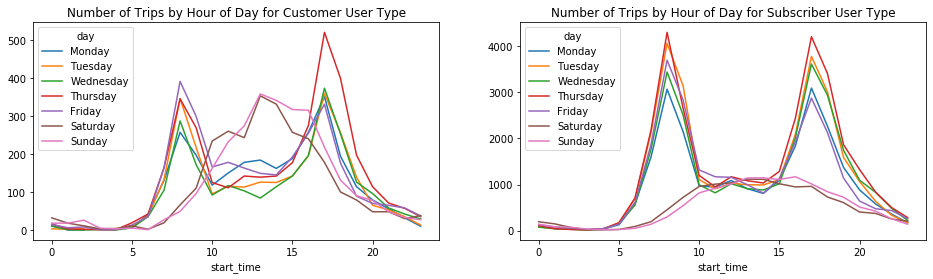

In [509]:
fig, axes = plt.subplots(ncols = 2, figsize = [16,4])

df_trips[df_trips['user_type'] == "Customer"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Customer User Type", ax = axes[0]);

df_trips[df_trips['user_type'] == "Subscriber"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Number of Trips by Hour of Day for Subscriber User Type", ax = axes[1]);

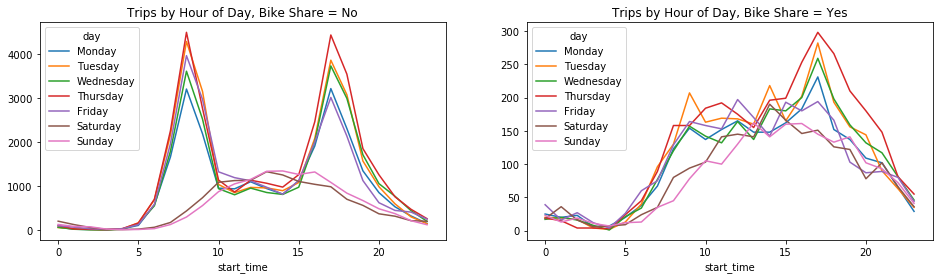

In [510]:
fig, axes = plt.subplots(ncols = 2, figsize = [16,4])

df_trips[df_trips['bike_share_for_all_trip'] == "No"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Trips by Hour of Day, Bike Share = No", ax = axes[0]);

df_trips[df_trips['bike_share_for_all_trip'] == "Yes"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='user_type', 
                     aggfunc='count').plot(title = "Trips by Hour of Day, Bike Share = Yes", ax = axes[1]);

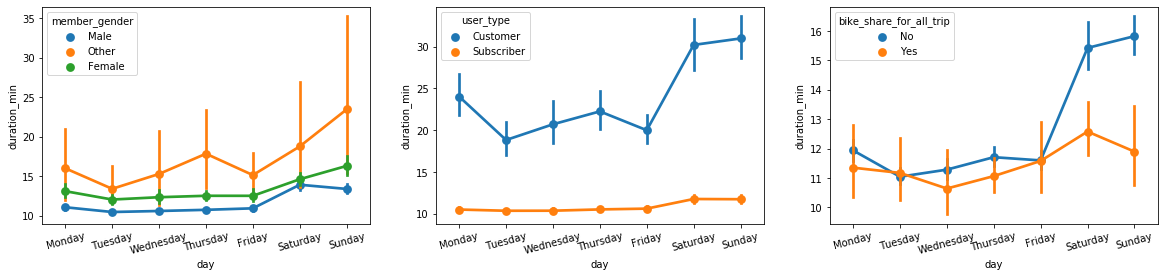

In [511]:
plt.figure(figsize=(20, 4))

plt.subplot(1,3,1)
sb.pointplot(data=df_trips, x='day', y='duration_min', hue='member_gender')
plt.xticks(rotation=15);

plt.subplot(1,3,2)
sb.pointplot(data=df_trips, x='day', y='duration_min', hue='user_type')
plt.xticks(rotation=15);

plt.subplot(1,3,3)
sb.pointplot(data=df_trips, x='day', y='duration_min', hue='bike_share_for_all_trip')
plt.xticks(rotation=15);

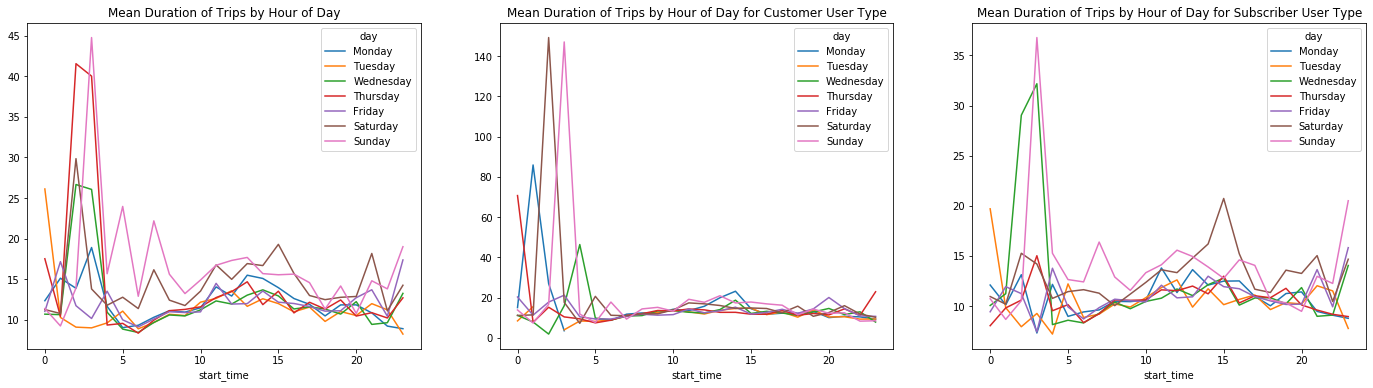

In [512]:
fig, axes = plt.subplots(ncols = 3, figsize = [24,6])

df_trips.pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='duration_min', 
                     aggfunc='mean').plot(title = "Mean Duration of Trips by Hour of Day", ax = axes[0])

df_trips[df_trips['member_gender'] == "Female"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='duration_min', 
                     aggfunc='mean').plot(title = "Mean Duration of Trips by Hour of Day for Customer User Type", ax = axes[1]);

df_trips[df_trips['member_gender'] == "Male"].pivot_table(index=df_trips['start_time'].dt.hour, 
                     columns='day', 
                     values='duration_min', 
                     aggfunc='mean').plot(title = "Mean Duration of Trips by Hour of Day for Subscriber User Type", ax = axes[2]);

In [513]:
# fig, axes = plt.subplots(ncols = 1, figsize = [16,6])

# df_trips.pivot_table(index=df_trips['start_time'].dt.hour, 
#                      columns='weekday', 
#                      values='distance', 
#                      aggfunc='mean').plot(ax = axes)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!